In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
data = pd.read_csv('train.csv')

In [226]:
data.text[200]

'HAPPENING NOW - HATZOLAH EMS AMBULANCE RESPONDING WITH DUAL SIRENS AND\x89Û_ https://t.co/SeK6MQ6NJF'

In [229]:
# keeping only the alphanumeric characters
import re
sentences = []
for i in range(0,len(data)):
    #x = re.sub(r'\W+'," ", data.text[i])
    x = re.sub(r'[^a-zA-Z0-9]+'," ", data.text[i])
    x = re.sub('\S+[0-9]\S+'," ", x)
    x = re.sub('\S+[0-9]'," ", x)
    x = re.sub('[0-9]\S+'," ", x)
    x = re.sub(r'\b\w{1,2}\b', '', x)
    sentences.append(x)
    

In [230]:
sentences[200]

'HAPPENING NOW HATZOLAH EMS AMBULANCE RESPONDING WITH DUAL SIRENS AND https    '

In [57]:
'''
import spacy
import sys
from collections import defaultdict
import en_core_web_sm
nlp = en_core_web_sm.load()
text = u'I work in Google asdasb asnlkasn'


with nlp.disable_pipes('ner'):
    doc = nlp(text)


threshold = 0.01
(beams) = nlp.entity.beam_parse([ doc ], beam_width = 16, beam_density = 0.0001)

entity_scores = defaultdict(float)
for beam in beams:
    for score, ents in nlp.entity.moves.get_beam_parses(beam):
        for start, end, label in ents:
            entity_scores[(start, end, label)] += score

print ('Entities and scores (detected with beam search)')
for key in entity_scores:
    start, end, label = key
    score = entity_scores[key]
    if ( score > threshold):
        print ('Label: {}, Text: {}, Score: {}'.format(label, doc[start:end], score))'''

"\nimport spacy\nimport sys\nfrom collections import defaultdict\nimport en_core_web_sm\nnlp = en_core_web_sm.load()\ntext = u'I work in Google asdasb asnlkasn'\n\n\nwith nlp.disable_pipes('ner'):\n    doc = nlp(text)\n\n\nthreshold = 0.01\n(beams) = nlp.entity.beam_parse([ doc ], beam_width = 16, beam_density = 0.0001)\n\nentity_scores = defaultdict(float)\nfor beam in beams:\n    for score, ents in nlp.entity.moves.get_beam_parses(beam):\n        for start, end, label in ents:\n            entity_scores[(start, end, label)] += score\n\nprint ('Entities and scores (detected with beam search)')\nfor key in entity_scores:\n    start, end, label = key\n    score = entity_scores[key]\n    if ( score > threshold):\n        print ('Label: {}, Text: {}, Score: {}'.format(label, doc[start:end], score))"

In [44]:
#nltk.help.upenn_tagset()

In [138]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk import sent_tokenize, word_tokenize, pos_tag

In [140]:
# keeping those words which are in english dictionary 
words = set(nltk.corpus.words.words())
for i in range(0,len(sentences)):
    sentences[i] = " ".join(w for w in nltk.wordpunct_tokenize(sentences[i]) if w.lower() in words or not w.isalpha())

In [231]:
# filtering words

# using spacy
print(sentences[200])
doc = nlp(sentences[200].lower())
store = []
for nounchunks in doc.noun_chunks:
    store = store+list(nounchunks)
print(store)    
store = str(store).replace(',',' ')
store = store[1:-1]
print(store)

# using nltk pos tag
word1 = word_tokenize(store)
store = pos_tag(word1)
print(store)
store = list(filter(lambda x: x[1][0:2] == 'NN', store))
print(store)
try:
    store = list(list(zip(*store))[0])
except:
    print('no value')
store = ' '.join(store)
store

HAPPENING NOW HATZOLAH EMS AMBULANCE RESPONDING WITH DUAL SIRENS AND https    
[hatzolah, ems, ambulance, dual, sirens, https]
hatzolah  ems  ambulance  dual  sirens  https
[('hatzolah', 'NN'), ('ems', 'VBZ'), ('ambulance', 'JJ'), ('dual', 'JJ'), ('sirens', 'NNS'), ('https', 'NN')]
[('hatzolah', 'NN'), ('sirens', 'NNS'), ('https', 'NN')]


'hatzolah sirens https'

In [142]:
# filtering all sentences using for loop

collection = [] 
for i in range(0,len(sentences)):   
    # using spacy
    doc = nlp(sentences[i].lower())
    store = []
    for nounchunks in doc.noun_chunks:
        store = store+list(nounchunks)
    store = str(store).replace(',',' ')
    store = store[1:-1]

    # using nltk pos tag
    word1 = word_tokenize(store)
    store = pos_tag(word1)
    store = list(filter(lambda x: x[1][0:2] == 'NN', store))
    try:
        store = list(list(zip(*store))[0])
    except:
        pass
    store = ' '.join(store)
    collection.append(store)

In [ ]:
collection

In [144]:
# filtering empty strings
collection = list(filter(None, collection))

In [145]:
collection

['reason earthquake',
 'fire canada',
 'place evacuation shelter place',
 'people evacuation',
 'photo school',
 'county fire',
 'flood disaster rain flooding streets',
 'hill fire',
 'emergency evacuation building street',
 'area',
 'people heat wave',
 'south',
 'days count',
 'flood bago',
 'damage school bus car crash',
 'man',
 'love',
 'summer',
 'love skiing',
 'day',
 'way',
 'love',
 'end',
 'metal',
 'news flag ablaze aba',
 'sky',
 'office',
 'police',
 'outside',
 'time head office site care',
 'hotel',
 'west',
 'life streets',
 'night year',
 'man home set',
 'man wife jail ablaze niece',
 'police superintendent salmon',
 'flag',
 'truck tambo cargo section',
 'hearts city gift',
 'west climate energy',
 'revel mac farewell route',
 'month torch',
 'ablaze skies',
 'something hood',
 'ablaze buff magnitude',
 'work',
 'bicycle accident father',
 'accident traffic',
 'accident center lane traffic',
 'advice solicitor',
 'teen car accident tee',
 'motor vehicle accident cur

In [222]:
'from nltk.tokenize import word_tokenize

In [228]:
'''for i in range(0,len(sentences)):
    sentences[i] = tokenizer(sentences[i])

In [133]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

In [146]:
# loading stop words

sw = stopwords.words('english')

In [147]:
# stemming words

stemmer = PorterStemmer()
def tokenizer(keyword):
    return [stemmer.stem(w) for w in keyword.split(' ')]
    

In [148]:
# tfidf vectorizer

tfidf = TfidfVectorizer(lowercase = True, tokenizer = tokenizer, stop_words = sw)

In [149]:
df = pd.DataFrame(tfidf.fit_transform(collection).toarray(), index = collection, columns = tfidf.get_feature_names())

C:\Users\ausaf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.



In [234]:

#from nltk.corpus import words
#"00cy9vxeff" in words.words()

stemmer.stem('hatzolah sirens')

'hatzolah siren'

In [150]:
# vevtorized form of data
df

aba  abandon  abil  ablaz  abomin  abort  \
reason earthquake               0.0      0.0   0.0    0.0     0.0    0.0   
fire canada                     0.0      0.0   0.0    0.0     0.0    0.0   
place evacuation shelter place  0.0      0.0   0.0    0.0     0.0    0.0   
people evacuation               0.0      0.0   0.0    0.0     0.0    0.0   
photo school                    0.0      0.0   0.0    0.0     0.0    0.0   
...                             ...      ...   ...    ...     ...    ...   
bridge collapse                 0.0      0.0   0.0    0.0     0.0    0.0   
state                           0.0      0.0   0.0    0.0     0.0    0.0   
volcano                         0.0      0.0   0.0    0.0     0.0    0.0   
police bike car                 0.0      0.0   0.0    0.0     0.0    0.0   
wildfire news                   0.0      0.0   0.0    0.0     0.0    0.0   

                                absenc  absolut  abu  abus  ...  youth  yuan  \
reason earthquake                  0.0      0.0  0.0   0.0  ...    0.0   0.0   
fire canada                        0.0      0.0  0.0   0.0  ...    0.0   0.0   
place evacuation shelter place     0.0      0.0  0.0   0.0  ...    0.0   0.0   
people evacuation                  0.0      0.0  0.0   0.0  ...    0.0   0.0   
photo school                       0.0      0.0  0.0   0.0  ...    0.0   0.0   
...                                ...      ...  ...   ...  ...    ...   ...   
bridge collapse                    0.0      0.0  0.0   0.0  ...    0.0   0.0   
state                              0.0      0.0  0.0   0.0  ...    0.0   0.0   
volcano                            0.0      0.0  0.0   0.0  ...    0.0   0.0   
police bike car                    0.0      0.0  0.0   0.0  ...    0.0   0.0   
wildfire news                      0.0      0.0  0.0   0.0  ...    0.0   0.0   

                                zaman  zar  zeal  zel  zip  zodiac  zombi  \
reason earthquake                 0.0  0.0   0.0  0.0  0.0     0.0    0.0   
fire canada                       0.0  0.0   0.0  0.0  0.0     0.0    0.0   
place evacuation shelter place    0.0  0.0   0.0  0.0  0.0     0.0    0.0   
people evacuation                 0.0  0.0   0.0  0.0  0.0     0.0    0.0   
photo school                      0.0  0.0   0.0  0.0  0.0     0.0    0.0   
...                               ...  ...   ...  ...  ...     ...    ...   
bridge collapse                   0.0  0.0   0.0  0.0  0.0     0.0    0.0   
state                             0.0  0.0   0.0  0.0  0.0     0.0    0.0   
volcano                           0.0  0.0   0.0  0.0  0.0     0.0    0.0   
police bike car                   0.0  0.0   0.0  0.0  0.0     0.0    0.0   
wildfire news                     0.0  0.0   0.0  0.0  0.0     0.0    0.0   

                                zone  
reason earthquake                0.0  
fire canada                      0.0  
place evacuation shelter place   0.0  
people evacuation                0.0  
photo school                     0.0  
...                              ...  
bridge collapse                  0.0  
state                            0.0  
volcano                          0.0  
police bike car                  0.0  
wildfire news                    0.0  

[6870 rows x 3343 columns]

In [152]:
df.to_csv('analyze.csv')

In [115]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

fig = ff.create_dendrogram(df)
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
inertia = []
for i in range(2,26):
    c = cluster.KMeans(i)
    c.fit(df)
    inertia.append(c.inertia_)        

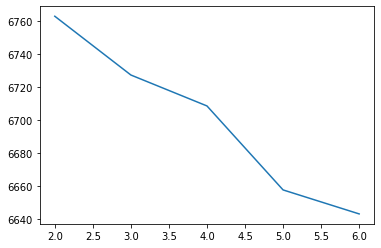

In [160]:
plt.plot(range(2,7),inertia[0:5])

In [ ]:
KK = []
for i in range(27,45):
    c = cluster.KMeans(i)
    c.fit(df)
    KK.append(c.inertia_) 

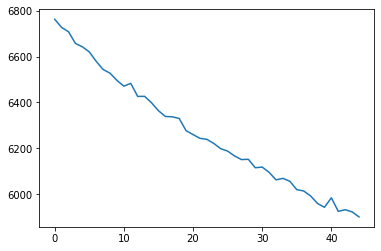

In [181]:
plt.plot(range(0,len(inertia+KK)),inertia+KK)

In [162]:
# making 5 sub divisions 

c = cluster.KMeans(5)
c.fit(df)
labels = c.inertia_
collection = pd.DataFrame(collection)
collection['label'] = c.labels_
collection.columns = ['text','label']

In [163]:
collection

text  label
0                  reason earthquake      3
1                        fire canada      1
2     place evacuation shelter place      3
3                  people evacuation      4
4                       photo school      3
...                              ...    ...
6865                 bridge collapse      3
6866                           state      3
6867                         volcano      3
6868                 police bike car      3
6869                   wildfire news      0

[6870 rows x 2 columns]

In [164]:
division_1 = collection[collection['label']==0]
division_2 = collection[collection['label']==1]
division_3 = collection[collection['label']==2]
division_4 = collection[collection['label']==3]
division_5 = collection[collection['label']==4]

In [238]:
division_1.text
division_1.index = range(0,len(division_1))
word_list = []
for i in range(0,len(division_1.text)):
    x = division_1.text[i].split()
    for j in range(0,len(x)):
        word_list.append(x[j])
        
Counter100 = Counter(word_list)    
Counter100.most_common(100) 

[('news', 184),
 ('video', 138),
 ('storm', 100),
 ('body', 95),
 ('content', 52),
 ('wildfire', 50),
 ('cross', 32),
 ('oil', 32),
 ('spill', 31),
 ('airport', 27),
 ('stock', 27),
 ('sandstorm', 27),
 ('dust', 25),
 ('minute', 24),
 ('policy', 23),
 ('market', 22),
 ('wind', 22),
 ('bag', 20),
 ('water', 19),
 ('ass', 18),
 ('violent', 18),
 ('shoulder', 17),
 ('effect', 17),
 ('blast', 16),
 ('truth', 14),
 ('ladies', 13),
 ('handbag', 13),
 ('leather', 13),
 ('purse', 12),
 ('police', 11),
 ('rubble', 11),
 ('crash', 10),
 ('world', 10),
 ('terrorism', 10),
 ('man', 8),
 ('music', 8),
 ('city', 8),
 ('hobo', 8),
 ('rain', 8),
 ('view', 8),
 ('effects', 7),
 ('china', 7),
 ('boat', 7),
 ('plane', 7),
 ('god', 7),
 ('monogram', 6),
 ('eyewitness', 6),
 ('link', 6),
 ('night', 5),
 ('avalanche', 5),
 ('fashion', 5),
 ('clutch', 5),
 ('county', 5),
 ('bush', 5),
 ('derailment', 5),
 ('emergency', 5),
 ('life', 5),
 ('part', 5),
 ('death', 5),
 ('site', 5),
 ('tornado', 5),
 ('quarantin

Text(0.5, 1.0, 'cluster 1')

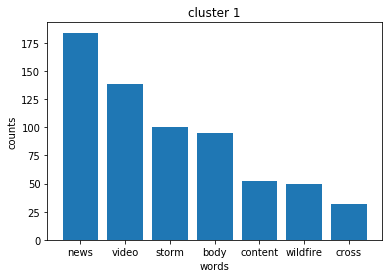

In [239]:
counts = Counter100.most_common(100) 
counts = pd.DataFrame(counts)
counts.columns = ('words','counts')
plt.bar(counts.words[:7],counts.counts[:7])
plt.xlabel('words')
plt.ylabel('counts')
plt.title('cluster 1')

In [240]:
division_2.text
division_2.index = range(0,len(division_2))
word_list = []
for i in range(0,len(division_2.text)):
    x = division_2.text[i].split()
    for j in range(0,len(x)):
        word_list.append(x[j])
        
Counter100 = Counter(word_list)    
Counter100.most_common(100)

[('fire', 211),
 ('truck', 26),
 ('evacuation', 10),
 ('alarm', 9),
 ('township', 7),
 ('road', 6),
 ('video', 5),
 ('apartment', 5),
 ('emergency', 5),
 ('odeon', 5),
 ('cinema', 5),
 ('mansion', 5),
 ('report', 5),
 ('street', 4),
 ('service', 4),
 ('danger', 4),
 ('shift', 4),
 ('focus', 4),
 ('wildfire', 4),
 ('city', 3),
 ('state', 3),
 ('hazard', 3),
 ('installation', 3),
 ('time', 3),
 ('drive', 3),
 ('area', 3),
 ('rescue', 3),
 ('everyone', 3),
 ('house', 3),
 ('forest', 3),
 ('route', 3),
 ('county', 2),
 ('non', 2),
 ('cladding', 2),
 ('car', 2),
 ('downtown', 2),
 ('building', 2),
 ('news', 2),
 ('multiple', 2),
 ('end', 2),
 ('metal', 2),
 ('brush', 2),
 ('line', 2),
 ('weather', 2),
 ('center', 2),
 ('wash', 2),
 ('phoenix', 2),
 ('show', 2),
 ('link', 2),
 ('tram', 2),
 ('highway', 2),
 ('scene', 2),
 ('call', 2),
 ('safety', 2),
 ('equipment', 2),
 ('trailer', 2),
 ('southbound', 2),
 ('traffic', 2),
 ('way', 2),
 ('careless', 2),
 ('match', 2),
 ('box', 2),
 ('campfire

Text(0.5, 1.0, 'cluster 2')

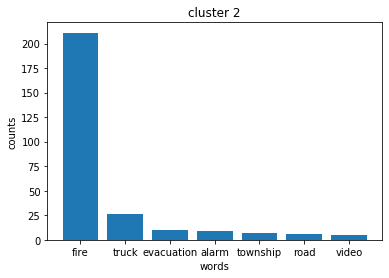

In [241]:
counts = Counter100.most_common(100) 
counts = pd.DataFrame(counts)
counts.columns = ('words','counts')
plt.bar(counts.words[:7],counts.counts[:7])
plt.xlabel('words')
plt.ylabel('counts')
plt.title('cluster 2')

In [219]:
division_3.text
division_3.index = range(0,len(division_3))
word_list = []
for i in range(0,len(division_3.text)):
    x = division_3.text[i].split()
    for j in range(0,len(x)):
        word_list.append(x[j])
        
Counter100 = Counter(word_list)    
Counter100.most_common(100)

[('disaster', 138),
 ('typhoon', 26),
 ('declaration', 19),
 ('emergency', 5),
 ('preparedness', 3),
 ('gunman', 3),
 ('hoax', 3),
 ('device', 3),
 ('cinema', 3),
 ('day', 3),
 ('japan', 3),
 ('flood', 2),
 ('rain', 2),
 ('response', 2),
 ('insurer', 2),
 ('action', 2),
 ('mitigation', 2),
 ('state', 2),
 ('man', 2),
 ('message', 2),
 ('condolence', 2),
 ('water', 2),
 ('government', 2),
 ('survival', 2),
 ('year', 2),
 ('life', 2),
 ('bomb', 2),
 ('story', 2),
 ('flooding', 1),
 ('streets', 1),
 ('center', 1),
 ('chemical', 1),
 ('training', 1),
 ('president', 1),
 ('commonwealth', 1),
 ('chocolate', 1),
 ('research', 1),
 ('song', 1),
 ('livelihood', 1),
 ('attempt', 1),
 ('money', 1),
 ('night', 1),
 ('hypocrisy', 1),
 ('architect', 1),
 ('thriller', 1),
 ('kindle', 1),
 ('thing', 1),
 ('quote', 1),
 ('error', 1),
 ('drop', 1),
 ('time', 1),
 ('inning', 1),
 ('event', 1),
 ('van', 1),
 ('august', 1),
 ('equation', 1),
 ('recipe', 1),
 ('body', 1),
 ('mind', 1),
 ('plan', 1),
 ('cont

Text(0, 0.5, 'counts')

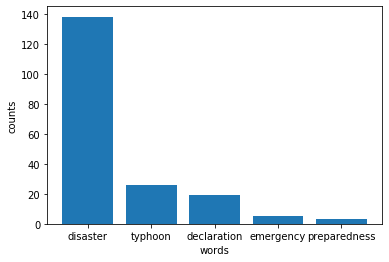

In [223]:
counts = Counter100.most_common(100) 
counts = pd.DataFrame(counts)
counts.columns = ('words','counts')
plt.bar(counts.words[:5],counts.counts[:5])
plt.xlabel('words')
plt.ylabel('counts')

In [170]:
division_4.text
division_4.index = range(0,len(division_4))
word_list = []
for i in range(0,len(division_4.text)):
    x = division_4.text[i].split()
    for j in range(0,len(x)):
        word_list.append(x[j])
        
Counter100 = Counter(word_list)    
Counter100.most_common(100)

[('emergency', 132),
 ('police', 107),
 ('man', 91),
 ('crash', 83),
 ('don', 82),
 ('war', 82),
 ('car', 80),
 ('world', 73),
 ('life', 71),
 ('train', 70),
 ('attack', 70),
 ('accident', 67),
 ('death', 66),
 ('day', 65),
 ('time', 62),
 ('army', 60),
 ('school', 58),
 ('mass', 56),
 ('bomb', 56),
 ('collapse', 55),
 ('bomber', 53),
 ('year', 51),
 ('city', 49),
 ('everyone', 48),
 ('wreck', 47),
 ('japan', 47),
 ('earthquake', 46),
 ('work', 45),
 ('way', 44),
 ('movie', 44),
 ('home', 42),
 ('water', 42),
 ('flood', 41),
 ('damage', 41),
 ('family', 41),
 ('explosion', 41),
 ('god', 39),
 ('state', 39),
 ('blood', 39),
 ('thunderstorm', 39),
 ('debris', 38),
 ('food', 38),
 ('weapon', 38),
 ('failure', 38),
 ('area', 37),
 ('injury', 37),
 ('house', 37),
 ('suicide', 37),
 ('thunder', 37),
 ('weather', 36),
 ('plan', 36),
 ('photo', 35),
 ('boy', 35),
 ('someone', 35),
 ('wreckage', 35),
 ('ambulance', 34),
 ('murder', 34),
 ('windstorm', 34),
 ('evacuation', 33),
 ('thing', 33),
 

In [182]:
division_5.text
division_5.index = range(0,len(division_5))
word_list = []
for i in range(0,len(division_5.text)):
    x = division_5.text[i].split()
    for j in range(0,len(x)):
        word_list.append(x[j])
        
Counter100 = Counter(word_list)    
Counter100.most_common(100)

[('people', 178),
 ('world', 8),
 ('flood', 6),
 ('mass', 6),
 ('strategy', 5),
 ('cable', 5),
 ('life', 4),
 ('bicyclist', 4),
 ('collision', 4),
 ('war', 4),
 ('line', 3),
 ('russia', 3),
 ('emergency', 3),
 ('wealth', 3),
 ('description', 3),
 ('attack', 3),
 ('media', 3),
 ('murder', 3),
 ('day', 3),
 ('house', 2),
 ('country', 2),
 ('help', 2),
 ('don', 2),
 ('hotel', 2),
 ('police', 2),
 ('anything', 2),
 ('cost', 2),
 ('man', 2),
 ('accident', 2),
 ('school', 2),
 ('none', 2),
 ('derail', 2),
 ('devastation', 2),
 ('storm', 2),
 ('bomb', 2),
 ('government', 2),
 ('car', 2),
 ('fear', 2),
 ('hurricane', 2),
 ('everything', 2),
 ('water', 2),
 ('history', 2),
 ('guy', 2),
 ('post', 2),
 ('rainstorm', 2),
 ('group', 2),
 ('trouble', 2),
 ('work', 2),
 ('upheaval', 2),
 ('bus', 2),
 ('evacuation', 1),
 ('heat', 1),
 ('wave', 1),
 ('someone', 1),
 ('airplane', 1),
 ('ability', 1),
 ('humanity', 1),
 ('god', 1),
 ('earth', 1),
 ('army', 1),
 ('cloudy', 1),
 ('year', 1),
 ('back', 1),


In [259]:
#word_list = [word for word in word_list if not word in stopwords.words()]

In [ ]:
pyenchant